In [1]:
from os import chdir
chdir('/Users/lananhnguyen/Desktop/thesis/thesis_code')
import main.packages.mine_generic as mine_g
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. 
- Clean up and save data of HICP COICOP10s and HICP of 4 sub-groups
- Visualize the descriptive statistics


## Clean up data HICP all:

In [2]:
HICP_monthly = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='HICP_Monthly')
HICP_monthly.head()

,mdates,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
0,1996-01-31,86.699997,NaN,74.199997,83.900002,72.000000,72.000000,67.900002,NaN,62.200001,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
1,1996-02-29,86.699997,NaN,73.800003,83.900002,72.199997,72.099998,68.099998,NaN,62.299999,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
2,1996-03-31,86.699997,NaN,73.800003,83.900002,72.300003,72.300003,68.199997,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.500000,64.099998,NaN
3,1996-04-30,86.699997,NaN,73.800003,83.900002,72.300003,72.300003,68.400002,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.599998,64.099998,NaN
4,1996-05-31,86.699997,NaN,73.599998,83.900002,72.500000,72.300003,68.500000,NaN,62.400002,...,85.900002,44.0,104.900002,NaN,NaN,60.055096,62.408463,68.599998,64.199997,NaN


In [3]:
HICP_Weights = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='HICP_Weights')
HICP_Weights = HICP_Weights.set_index('mdates')
HICP_Weights.head()

,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,Yeast.pastry,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
mdates,,,,,,,,,,,,,,,,,,,,,
1996-01-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,0.73,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
1996-02-29,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,0.73,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
1996-03-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,0.73,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
1996-04-30,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,0.73,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN
1996-05-31,0.41,NaN,0.35,0.22,0.68,2.25,1.27,NaN,4.0,0.73,...,4.37,1.8,3.15,NaN,NaN,1.1,1.04,0.51,0.44,NaN


In [4]:
HICP_class = pd.read_excel('data/HICP_COICOP10s.xlsx', sheet_name='COICOP_class')
HICP_class.index = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
HICP_class.head()

,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,Yeast.pastry,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
Group 1,Food,Food,Food,Food,Food,Food,Food,Food,Food,Food,...,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food,Non-food
Group 2,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,Processed food,...,Services,Services,Services,Services,Services,Services,Services,Services,Services,Services
Group 3,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,...,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services
Group 4,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,bread and cereals,...,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services,miscellaneous services


Here is my approach for forecasting headline inflation:

First approach: 
1. Remove all columns that have missing values

2. Calculate year-on-year growth rate HICP_COICOP10 by:

a. Calculate the year-on-year growth rate for each month by subtracting the CPI index of the corresponding month in the previous year from the CPI index of the current year. Then divide the result by the CPI index of the previous year.

b. Express the year-on-year growth rate as a percentage by multiplying it by 100. 

In [5]:
# main predictors:

HICP_yoy = pd.DataFrame()
HICP_yoy = (HICP_monthly.iloc[:, 1:].pct_change(periods=12) * 100) #year-on-year percentage change
HICP_yoy['date'] = HICP_monthly['mdates']
HICP_yoy = HICP_yoy.set_index('date')
HICP_yoy.dropna(axis= 0, how= 'all', inplace=True)
HICP_yoy.to_csv('data/preprocessed/hicp_yoy.csv')


## Clean up data HICP 4 groups:

Data length: 331 rows from 69.9 to 141.2
0           hicp_food
date                 
1996-01-31       69.9
1996-02-29       70.3
1996-03-31       70.6
1996-04-30       70.8
1996-05-31       70.7


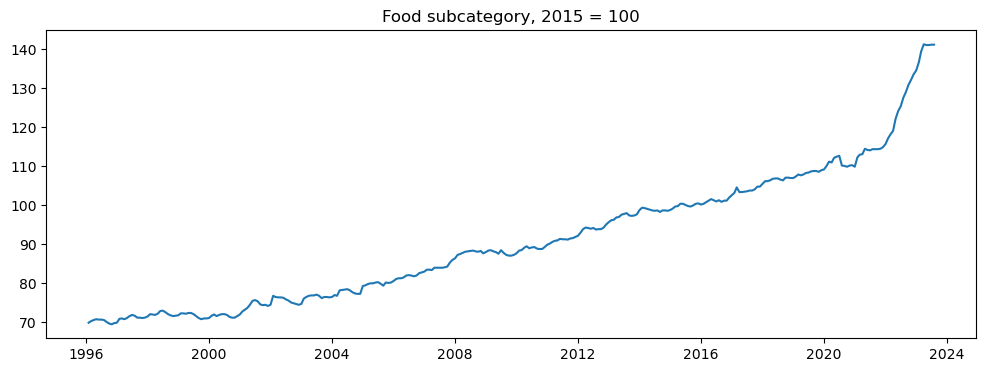

In [7]:
food_df = mine_g.load_excel('data/hicp_cat_raw/prc_hicp_food.xlsx', name = 'hicp_food',subset=True)
mine_g.data_viz(food_df, title= 'Food subcategory, 2015 = 100')

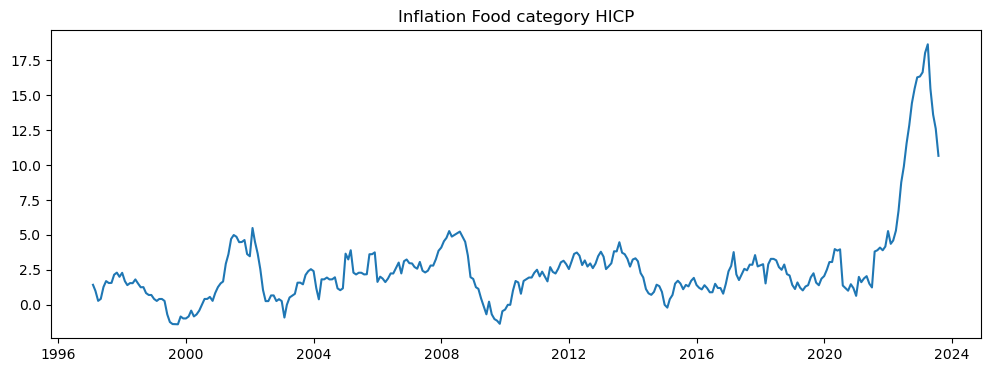

In [8]:
food_inf_yoy = mine_g.transform_yoy_rate(food_df)
mine_g.data_viz(food_inf_yoy, title= 'Inflation Food category HICP')
food_inf_yoy.to_csv('data/preprocessed/food_yoy_infl.csv')

Data length: 331 rows from 50.4 to 153.6
0           hicp_energy
date                   
1996-01-31         50.4
1996-02-29         50.7
1996-03-31         50.8
1996-04-30         51.3
1996-05-31         51.2


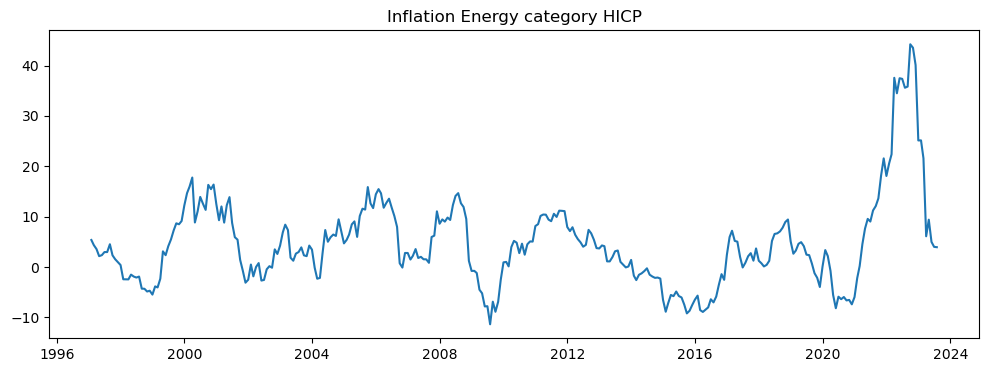

In [9]:
enery_df = mine_g.load_excel('data/hicp_cat_raw/prc_hicp_energy.xlsx', name = 'hicp_energy',subset=True)
energy_inf_yoy = mine_g.transform_yoy_rate(enery_df)
mine_g.data_viz(energy_inf_yoy, title= 'Inflation Energy category HICP')
energy_inf_yoy.to_csv('data/preprocessed/energy_yoy_infl.csv')

Data length: 331 rows from 74.5 to 119.6
0           hicp_services
date                     
1996-01-31           74.5
1996-02-29           75.1
1996-03-31           75.1
1996-04-30           74.7
1996-05-31           75.1


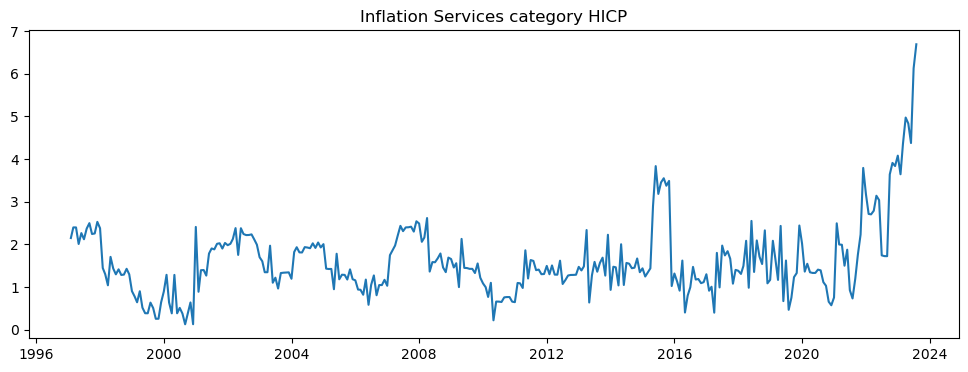

In [10]:
services_df = mine_g.load_excel('data/hicp_cat_raw/prc_hicp_services.xlsx', name = 'hicp_services',subset=True)
services_inf_yoy = mine_g.transform_yoy_rate(services_df)
mine_g.data_viz(services_inf_yoy, title= 'Inflation Services category HICP')
services_inf_yoy.to_csv('data/preprocessed/services_yoy_infl.csv')

Data length: 331 rows from 90.6 to 118.8
0           hicp_neig
date                 
1996-01-31       90.6
1996-02-29       90.8
1996-03-31       90.8
1996-04-30       90.8
1996-05-31       90.8


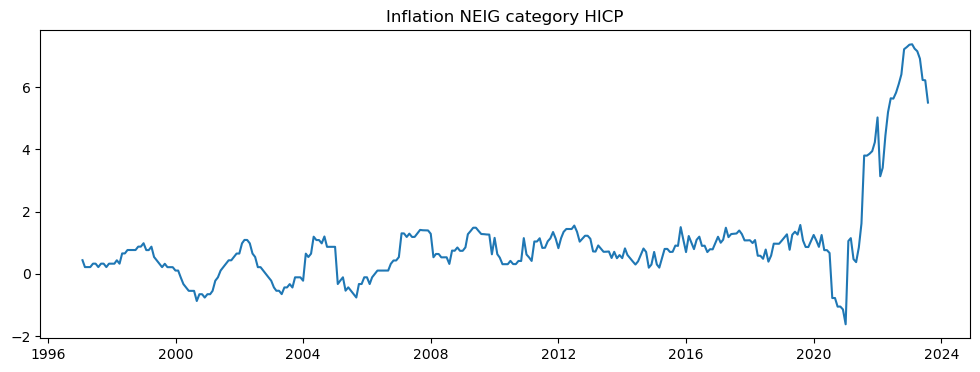

In [11]:
neig_df = mine_g.load_excel('data/hicp_cat_raw/prc_hicp_neig.xlsx', name = 'hicp_neig',subset=True)
neig_inf_yoy = mine_g.transform_yoy_rate(neig_df)
mine_g.data_viz(neig_inf_yoy, title= 'Inflation NEIG category HICP')
neig_inf_yoy.to_csv('data/preprocessed/neig_yoy_infl.csv')

-----

## Visulize for descriptive statistics:

In [12]:
# standardise and plot:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

hicp_std = pd.DataFrame(scaler.fit_transform(HICP_yoy), columns=HICP_yoy.columns)
hicp_std.index = HICP_yoy.index
hicp_std.head()

,Rice,Rice.preparations,Flour,Semolina..rye.flour.or.the.like,White.bread,Rye.bread.or.brown.bread,Granary.bread.or.wholemeal.bread,Ready.to.bake.rolls,Fresh.bread.rolls,Yeast.pastry,...,Premium.for.personal.liability.insurance,Premium.for.legal.protection.insurance,Bank.charges,Charge.for.tax.consultant.services,Charge.for.birth.certificate..death.certificate.or.the.like,Passport.fee.or.the.like,Fee.for.lawyer.s.or.notary.s.services,Charge.for.funeral.services.or.cemetery.fee,Classified.advertisement.in.a.newspaper,Visitor.s.tax
date,,,,,,,,,,,,,,,,,,,,,
1997-01-31,-0.638035,NaN,-0.293674,-0.343679,-0.117648,-0.161801,-0.140162,NaN,-0.226393,-0.286718,...,2.335241,-0.623471,-0.146964,NaN,NaN,2.28242,0.442741,0.727794,-0.815330,NaN
1997-02-28,-0.586464,NaN,-0.231896,-0.324277,-0.064846,-0.061601,-0.246238,NaN,-0.273793,-0.431020,...,2.335241,-0.623471,-0.146964,NaN,NaN,2.28242,0.442741,0.727794,-0.815330,NaN
1997-03-31,-0.612251,NaN,-0.221572,-0.343679,-0.120615,-0.164536,-0.247152,NaN,-0.321042,-0.432294,...,2.335241,-0.623471,-0.164038,NaN,NaN,2.28242,0.442741,0.727794,-0.666471,NaN
1997-04-30,-0.560680,NaN,-0.221572,-0.343679,-0.065911,-0.114119,-0.300716,NaN,-0.274687,-0.432294,...,2.335241,-0.623471,-0.164038,NaN,NaN,2.28242,0.442741,0.724069,-0.368743,NaN
1997-05-31,-0.612251,NaN,-0.211107,-0.343679,-0.122573,-0.114119,-0.301547,NaN,-0.228331,-0.503969,...,2.059797,-0.623471,-0.232335,NaN,NaN,2.28242,0.442741,0.724069,-0.074504,NaN


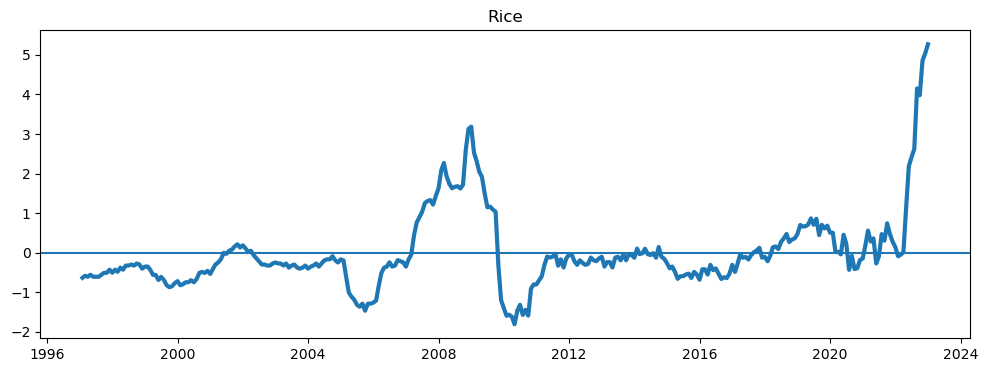

In [12]:
mine_g.data_viz(hicp_std.iloc[:, 0], title=hicp_std.columns[0], add_line=True)


In [13]:
# visualize the distribution of all data:
head_infl = pd.read_csv('data/preprocessed/head_inflation.csv')
head_infl.head()

,date,yoy_rate
0,1997-01-31,1.864181
1,1997-02-28,1.587302
2,1997-03-31,1.321004
3,1997-04-30,1.190476
4,1997-05-31,1.453104


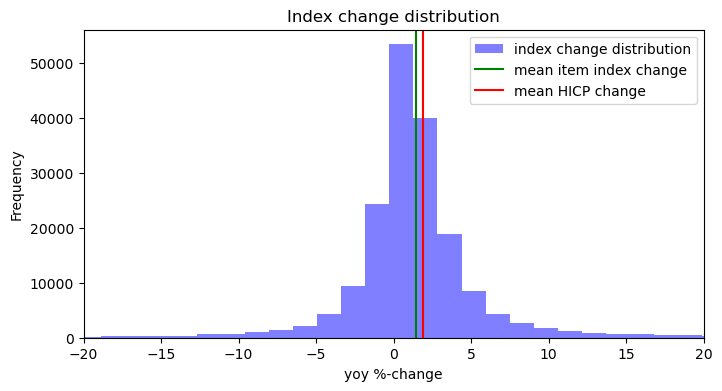

In [14]:
values = HICP_yoy.values.flatten()
values = values[~np.isnan(values)]


# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(values, bins=150, color='blue', alpha=0.5, label = 'index change distribution')
plt.axvline(values.mean(), color = 'green', label = 'mean item index change', lw = 1.5)
plt.axvline(head_infl.iloc[:, 1].mean(), color = 'red', label = 'mean HICP change', lw = 1.5)
plt.xlabel('yoy %-change')
plt.ylabel('Frequency')
plt.xlim((-20, 20))
plt.legend()
plt.title('Index change distribution')
plt.show()

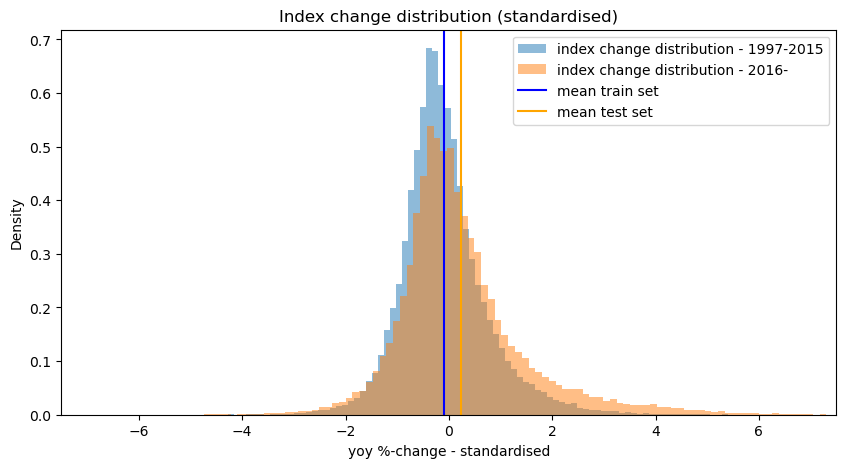

In [15]:
# Compare distribution of training set/test set:
hicp_std_train = hicp_std[hicp_std.index < '2016-01-01']
hicp_std_test = hicp_std[hicp_std.index >= '2016-01-01']

values1 = hicp_std_train.values.flatten()
values1 = values1[~np.isnan(values1)]

values2 = hicp_std_test.values.flatten()
values2 = values2[~np.isnan(values2)]

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(values1, bins=150, alpha=0.5, label = 'index change distribution - 1997-2015', density=True)
plt.hist(values2, bins=150, alpha=0.5, label = 'index change distribution - 2016-', density=True)

plt.axvline(values1.mean(), label = 'mean train set', lw = 1.5, color = 'blue')
plt.axvline(values2.mean(), label = 'mean test set', lw = 1.5, color = 'orange')

plt.xlabel('yoy %-change - standardised')
plt.ylabel('Density')
plt.legend()
plt.title('Index change distribution (standardised)')
plt.xlim((-7.5, 7.5))
plt.show()

-> there's a change in distribution between train set and test set.

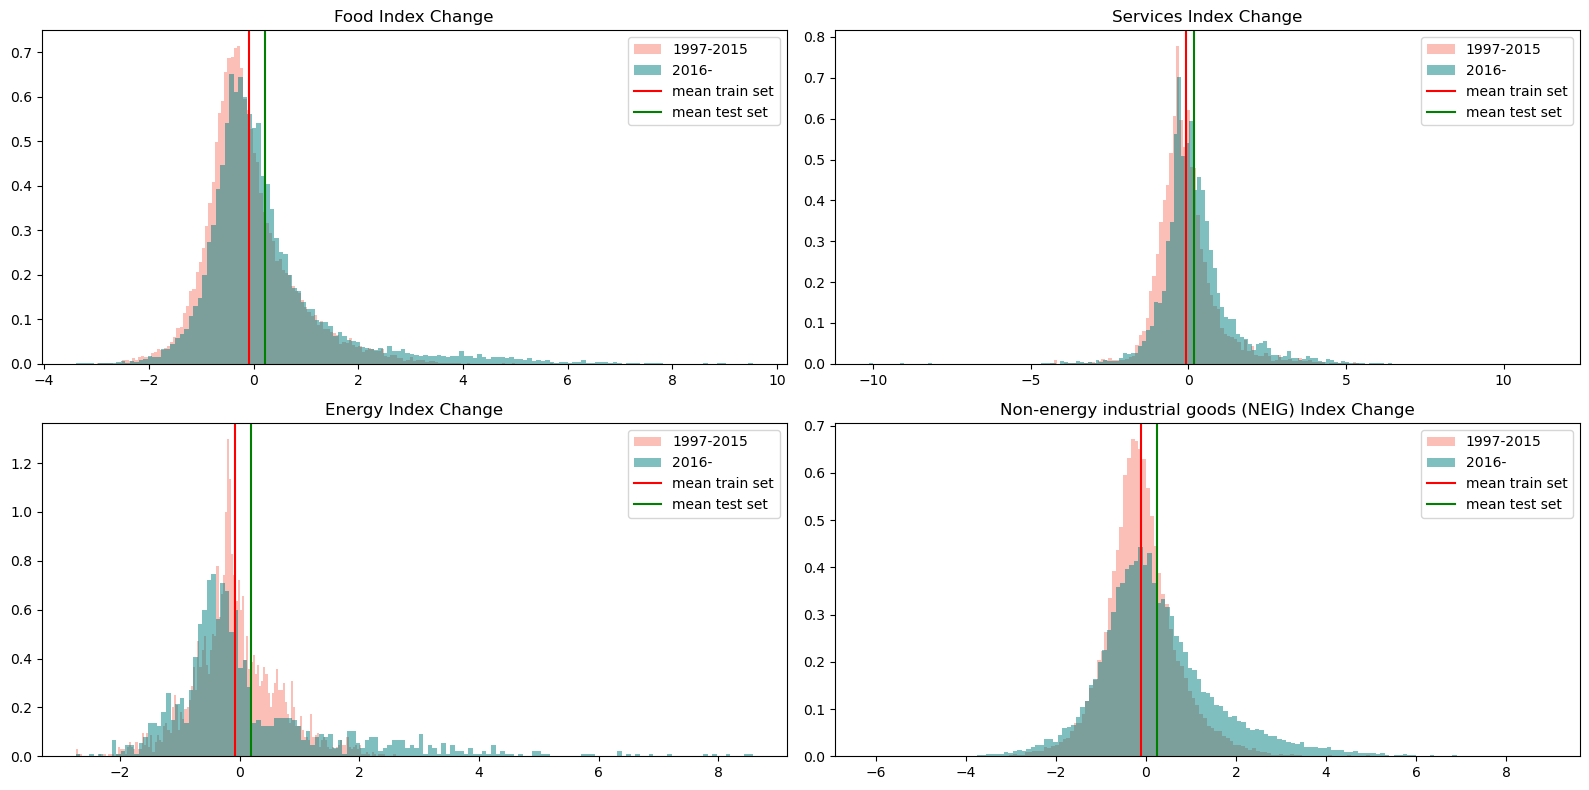

In [16]:
food_std = hicp_std.loc[:, (HICP_class.iloc[0, :] == 'Food')]
services_std = hicp_std.loc[:, HICP_class.iloc[1, :] == 'Services']
energy_std = hicp_std.loc[:, HICP_class.iloc[1, :] == 'Energy']
negi_std = hicp_std.loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']


rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))  # Adjust figsize for better visualization

# Loop through dataframes and subplots

df_list = [food_std, services_std, energy_std, negi_std]
name_list = ['Food', 'Services', 'Energy', 'Non-energy industrial goods (NEIG)']
for i in range(rows):
    for j in range(cols):
        df = df_list[i * cols + j]
        # Split data for training and testing
        X_train, X_test = df[df.index < '2016-01-01'], df[df.index >= '2016-01-01']

        values1 = X_train.values.flatten()
        values1 = values1[~np.isnan(values1)]

        values2 = X_test.values.flatten()
        values2 = values2[~np.isnan(values2)]

        ax = axes[i, j]

        # Create histograms on the current subplot
        ax.hist(values1, bins=150, alpha=0.5, label='1997-2015', density=True, color='salmon')
        ax.hist(values2, bins=150, alpha=0.5, label='2016-', density=True, color= 'teal')

        ax.axvline(values1.mean(), label = 'mean train set', lw = 1.5, color = 'red')
        ax.axvline(values2.mean(), label = 'mean test set', lw = 1.5, color = 'green')

        ax.set_title(name_list[i * cols + j] + ' Index Change')  # Set title based on dataframe name
        ax.legend()  # Add legend

# Tight layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Extract data into groups:
# Without missing values:

food_f = HICP_yoy.dropna(axis=1).loc[:, (HICP_class.iloc[0, :] == 'Food')]
services_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Services']
energy_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Energy']
negi_f = HICP_yoy.dropna(axis=1).loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']

print('Number of items in food group: ', food_f.shape[1])
print('Number of items in services group: ', services_f.shape[1])
print('Number of items in energy group: ', energy_f.shape[1])
print('Number of items in Non-energy industrial goods (NEIG) group: ', negi_f.shape[1])
print('Total: ', food_f.shape[1] + services_f.shape[1]+ negi_f.shape[1] + energy_f.shape[1])

Number of items in food group:  147
Number of items in services group:  102
Number of items in energy group:  12
Number of items in Non-energy industrial goods (NEIG) group:  230
Total:  491


In [18]:
# Extract data into groups:
# ALL:

food = HICP_yoy.loc[:, (HICP_class.iloc[0, :] == 'Food')]
services = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Services']
energy = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Energy']
negi = HICP_yoy.loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']

print('Number of items in food group: ', food.shape[1])
print('Number of items in services group: ', services.shape[1])
print('Number of items in energy group: ', energy.shape[1])
print('Number of items in Non-energy industrial goods (NEIG) group: ', negi.shape[1])
print('Total: ', food.shape[1] + services.shape[1]+ negi.shape[1] + energy.shape[1])

Number of items in food group:  180
Number of items in services group:  148
Number of items in energy group:  14
Number of items in Non-energy industrial goods (NEIG) group:  302
Total:  644


### Check the missing values and their weights:


In [19]:
# check if any items are dropped after changing the reference year:

HICP_yoy.iloc[-1, :].isna().any()

False

In [20]:
# create df reporting number of items by year:

summary_df_num = pd.DataFrame(columns=['food', 'services', 'energy', 'negi', 'total'], 
                          index = ['1997-01-31','2001-01-31', '2006-01-31', '2011-01-31', '2016-01-31'])
for i in summary_df_num.index:
    summary_df_num.loc[i, 'food'] = food.loc[i].count()
    summary_df_num.loc[i, 'services'] = services.loc[i].count()
    summary_df_num.loc[i, 'energy'] = energy.loc[i].count()
    summary_df_num.loc[i, 'negi'] = negi.loc[i].count()
summary_df_num.loc[:, 'total'] = summary_df_num.sum(axis=1)
#summary_df_num.loc[:, 'missing values'] = 644 - summary_df_num.loc[:, 'total']

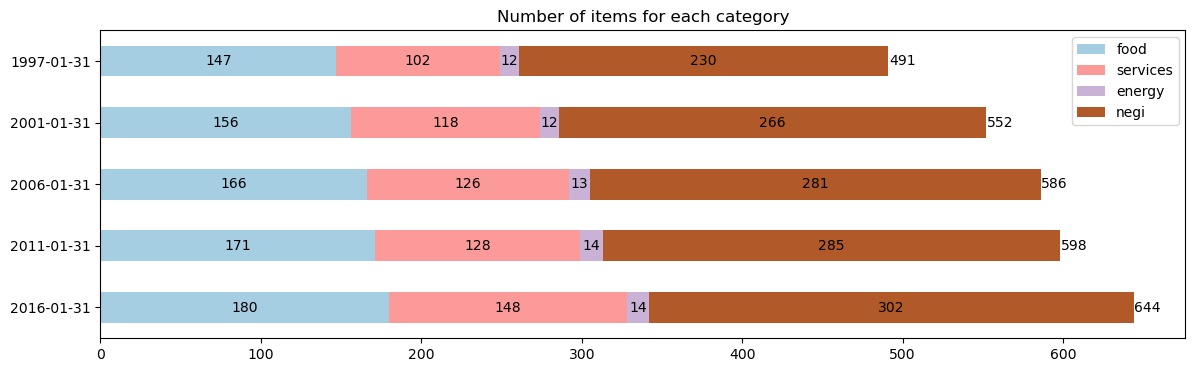

In [21]:

ax = summary_df_num.drop(columns='total').sort_index(ascending=False).plot(kind='barh', stacked=True, cmap='Paired', figsize=(14, 4))
plt.title('Number of items for each category')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Show the total sum as labels for each bar
for i, v in enumerate(summary_df_num['total'].sort_index(ascending=False)):
    ax.text(v + 0.4, i, str(v), color='black', va='center')
    
plt.legend()
#plt.tight_layout()
plt.show()


In [26]:
# create df reporting weights by year:
food_w = HICP_Weights.loc[:, (HICP_class.iloc[0, :] == 'Food')]
services_w = HICP_Weights.loc[:, HICP_class.iloc[1, :] == 'Services']
energy_w = HICP_Weights.loc[:, HICP_class.iloc[1, :] == 'Energy']
neig_w = HICP_Weights.loc[:, HICP_class.iloc[1, :] == 'Non-energy industrial goods (NEIG)']


summary_df_w = pd.DataFrame(columns=['food', 'services', 'energy', 'neig', 'total'], 
                          index = ['1997-01-31','2001-01-31', '2006-01-31', '2011-01-31', '2016-01-31'])
for i in summary_df_w.index:
    summary_df_w.loc[i, 'food'] = food_w.loc[i].sum()
    summary_df_w.loc[i, 'services'] = services_w.loc[i].sum()
    summary_df_w.loc[i, 'energy'] = energy_w.loc[i].sum()
    summary_df_w.loc[i, 'neig'] = neig_w.loc[i].sum()
summary_df_w['total'] = summary_df_w.sum(axis=1)

summary_df_w

,food,services,energy,neig,total
1997-01-31,159.366666,473.683334,82.76,284.186667,999.996666
2001-01-31,140.609999,492.526667,80.72,280.063333,993.919999
2006-01-31,142.54,500.990006,95.190002,255.470001,994.190009
2011-01-31,140.3,510.480003,106.56,233.04,990.380004
2016-01-31,134.62,521.599996,103.830001,229.95,989.999996


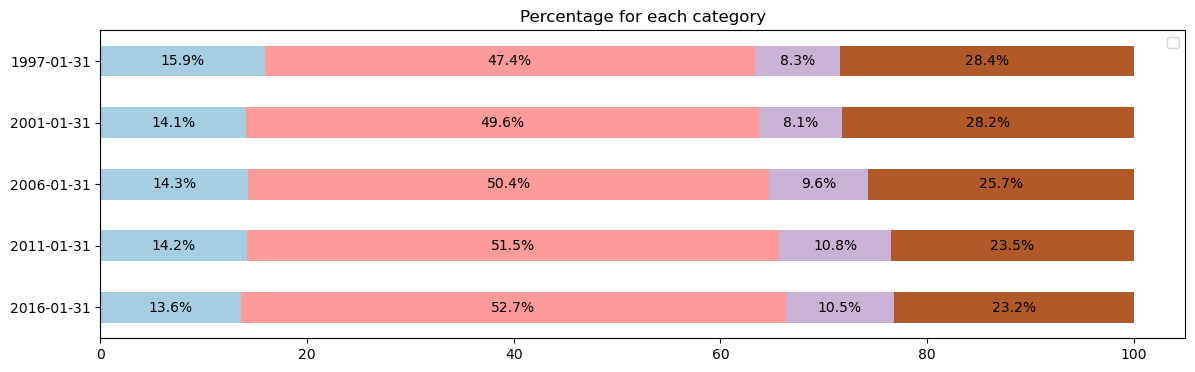

In [39]:
df_percentage = summary_df_w.drop(columns='total').div(summary_df_w.loc[:,'total'], axis=0) * 100
df_pct = df_percentage.astype(float).round(1)

# Plot the stacked 100% bar chart
ax = df_pct.sort_index(ascending=False).plot(kind='barh', stacked=True, figsize=(14, 4), colormap='Paired')
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')

plt.title('Percentage for each category')
plt.legend([])
plt.show()
